In [49]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.signal import find_peaks

In [2]:
def read_spectral_data(file_name):
    """
    Reads the spectral data from the given file.

    :param file_name: Name of the file.
    :return: A tuple (wavelengths, values).
    """
    with open(file_name, 'r') as file:
        content = file.readlines()

    # Extract the spectral data part
    data_start_index = content.index('>>>>>Begin Spectral Data<<<<<\n') + 1
    spectral_data = content[data_start_index:]

    # Separate wavelengths and values
    wavelengths = [float(line.split()[0]) for line in spectral_data]
    values = [float(line.split()[1]) for line in spectral_data]

    return wavelengths, values

In [6]:
h2_1 = read_spectral_data('h2-1.txt')
h2_2 = read_spectral_data('h2-2.txt')
h2d2_1 = read_spectral_data('h2d2-1.txt')
h2d2_2 = read_spectral_data('h2d2-2.txt')
h2d2_3 = read_spectral_data('h2d2-3.txt')

In [14]:
def filter_data_by_range(wavelengths, values, x_range):
    """
    Filters the data by a specific x range.

    :param wavelengths: List of wavelengths.
    :param values: List of values corresponding to the wavelengths.
    :param x_range: Tuple with (min, max) values for x range.
    :return: Filtered wavelengths and values.
    """
    filtered_wavelengths = [w for w in wavelengths if x_range[0] <= w <= x_range[1]]
    filtered_values = [v for i, v in enumerate(values) if x_range[0] <= wavelengths[i] <= x_range[1]]
    
    return filtered_wavelengths, filtered_values

In [43]:
range = (655.3, 656.2)
h2_1_filtered = filter_data_by_range(*h2_1, range)
h2_2_filtered = filter_data_by_range(*h2_2, range)
h2d2_1_filtered = filter_data_by_range(*h2d2_1, range)
h2d2_2_filtered = filter_data_by_range(*h2d2_2, (655, 658.5))
h2d2_3_filtered = filter_data_by_range(*h2d2_3, range)

In [47]:
def plot_spectral_data(wavelengths, values, title="Spectral Data"):
    """
    Plots the spectral data.

    :param wavelengths: List of wavelengths.
    :param values: List of values corresponding to the wavelengths.
    :param title: Title for the plot.
    """
    # Optional: Setting seaborn style
    sns.set_style("whitegrid")

    plt.figure(figsize=(10, 6))

    # Modified plot with adjusted aesthetics
    plt.plot(wavelengths, values, marker='o', markersize=2, linestyle='-', color='g', markerfacecolor='b')

    plt.title(title, fontsize=16)
    plt.xlabel('Wavelength', fontsize=14)
    plt.ylabel('Intensity', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    
    plt.show()

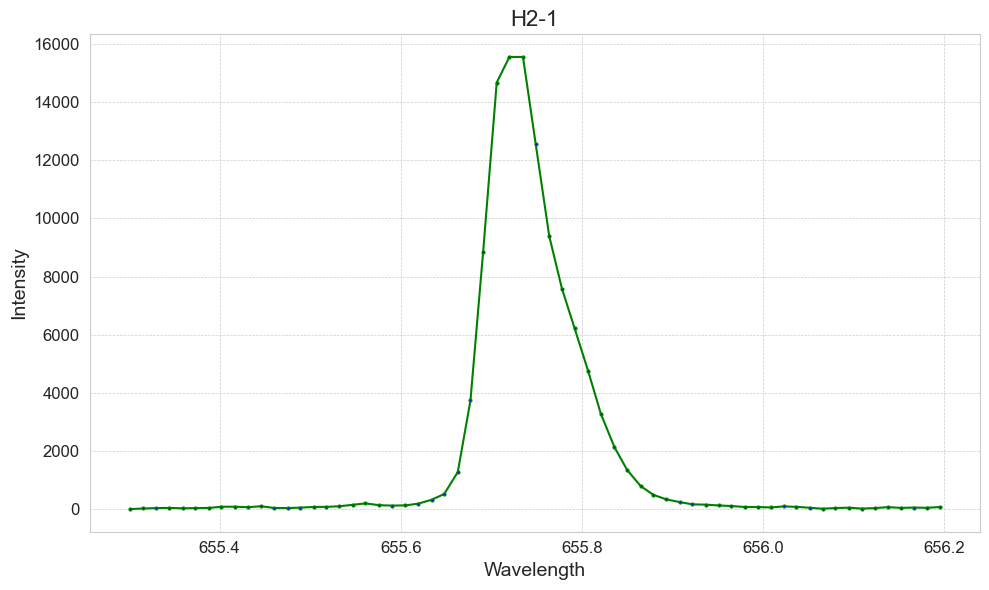

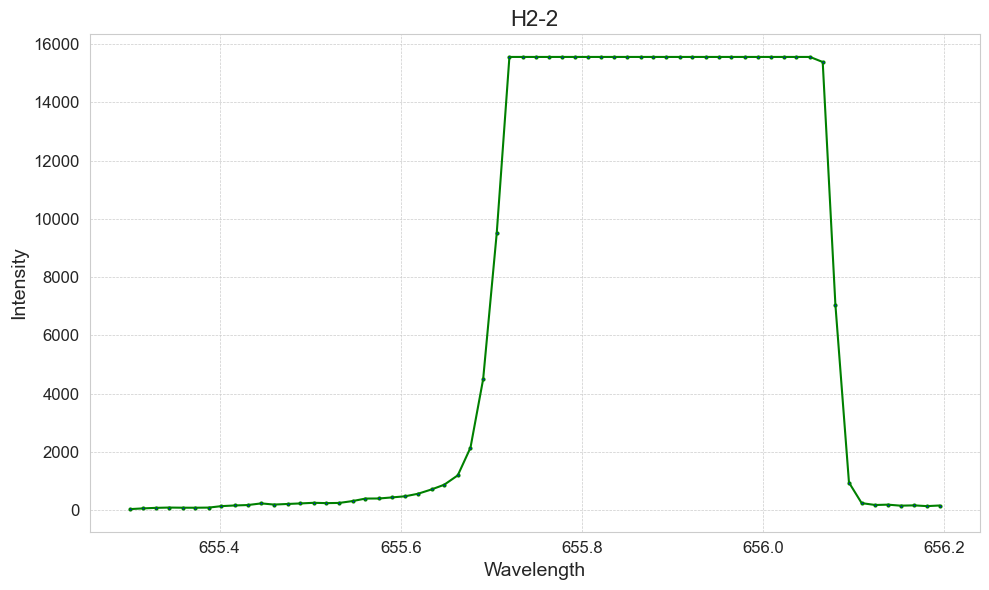

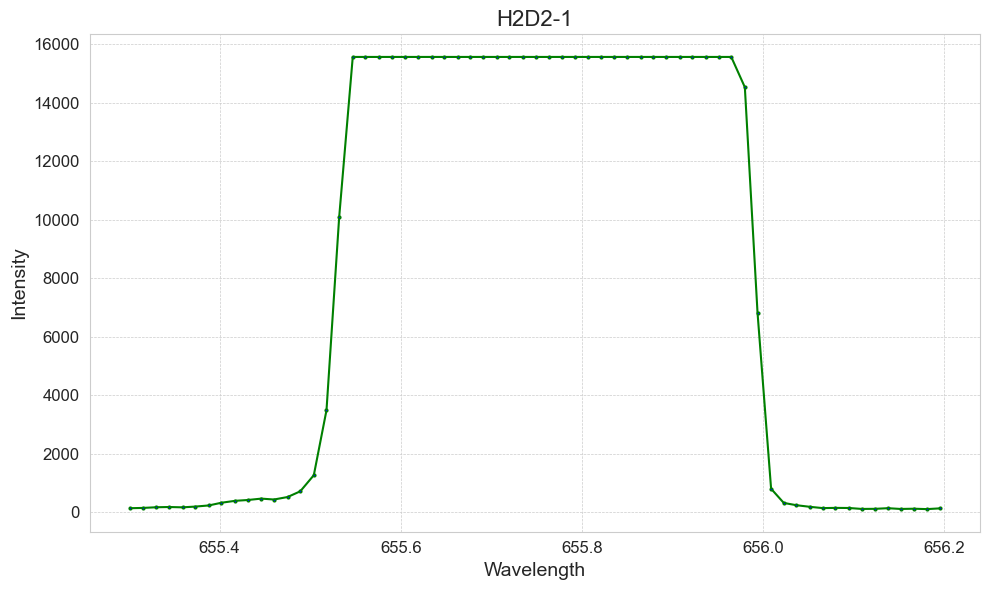

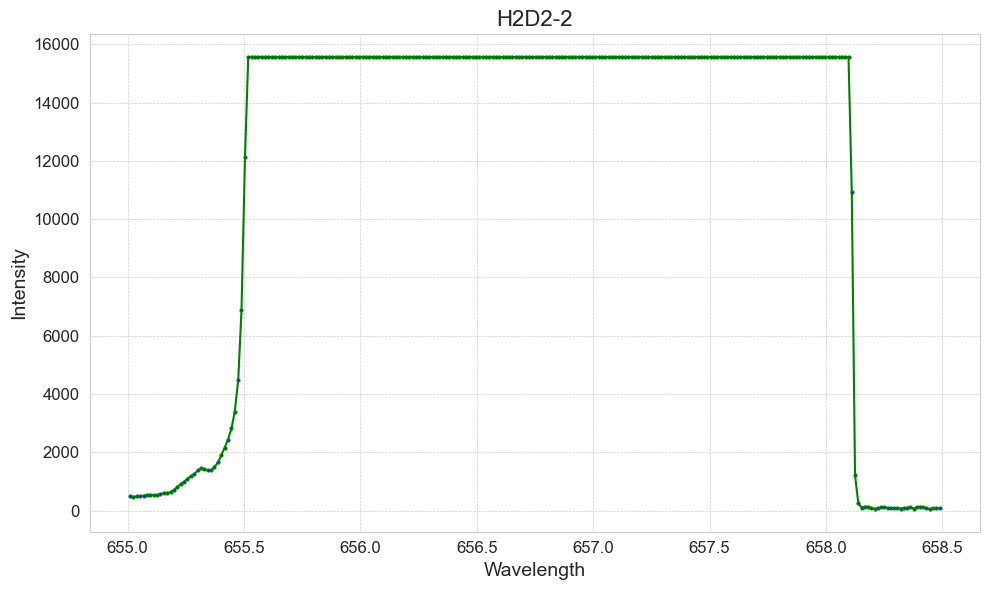

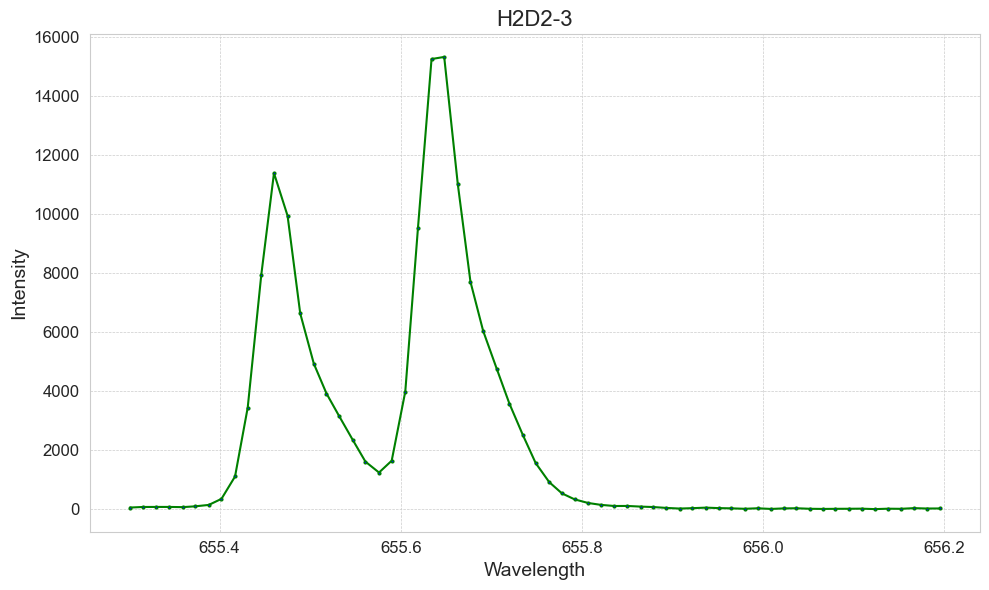

In [48]:
plot_spectral_data(*h2_1_filtered, title='H2-1')
plot_spectral_data(*h2_2_filtered, title='H2-2')
plot_spectral_data(*h2d2_1_filtered, title='H2D2-1')
plot_spectral_data(*h2d2_2_filtered, title='H2D2-2')
plot_spectral_data(*h2d2_3_filtered, title='H2D2-3')


In [129]:
def plot_dual_spectral_data(wavelengths1, values1, wavelengths2, values2, 
                            label1="Data 1", label2="Data 2", 
                            title="Spectral Data", vertical_bars=None):
    """
    Plots two sets of spectral data on the same graph.

    :param wavelengths1: List of wavelengths for the first dataset.
    :param values1: List of values corresponding to wavelengths1.
    :param wavelengths2: List of wavelengths for the second dataset.
    :param values2: List of values corresponding to wavelengths2.
    :param label1: Label for the first dataset (for the legend).
    :param label2: Label for the second dataset (for the legend).
    :param title: Title for the plot.
    :param vertical_bars: List of x-values where vertical bars will be added.
    """
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))

    # Plotting the data
    plt.plot(wavelengths1, values1, marker='o', markersize=2, linestyle='-', color='g', markerfacecolor='b', label=label1)
    plt.plot(wavelengths2, values2, marker='o', markersize=2, linestyle='-', color='r', markerfacecolor='y', label=label2)

    # Adding vertical bars at given x-values
    if vertical_bars:
        for x_value in vertical_bars:
            plt.axvline(x=x_value, color='orange', linestyle='--', linewidth=1)
            plt.text(x_value, -300, str(x_value), rotation=0, verticalalignment='top', fontsize=10.7)

    plt.title(title, fontsize=16)
    plt.xlabel('Wavelength', fontsize=14)
    plt.ylabel('Intensity', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc="best", fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    
    plt.show()

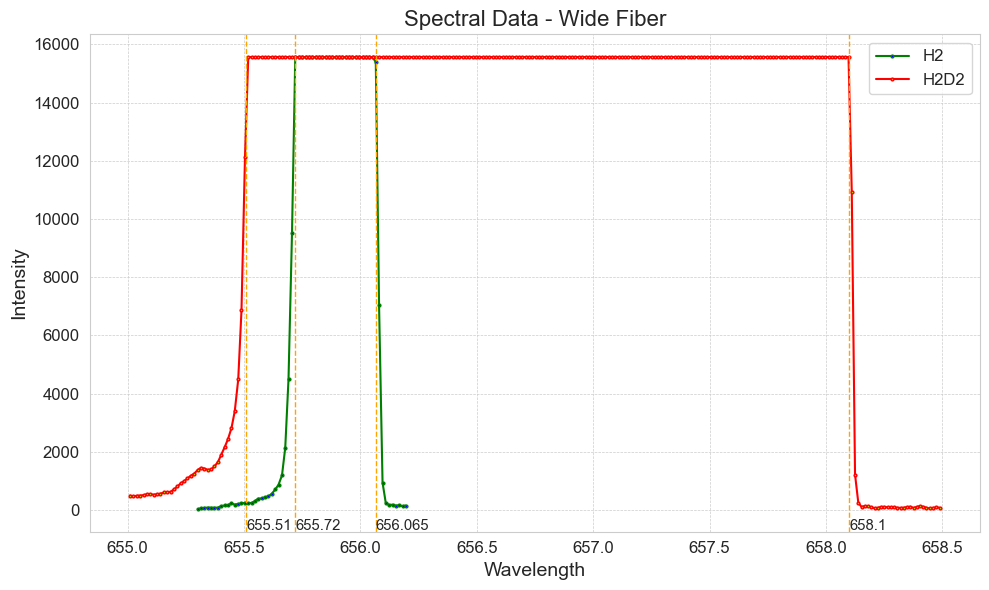

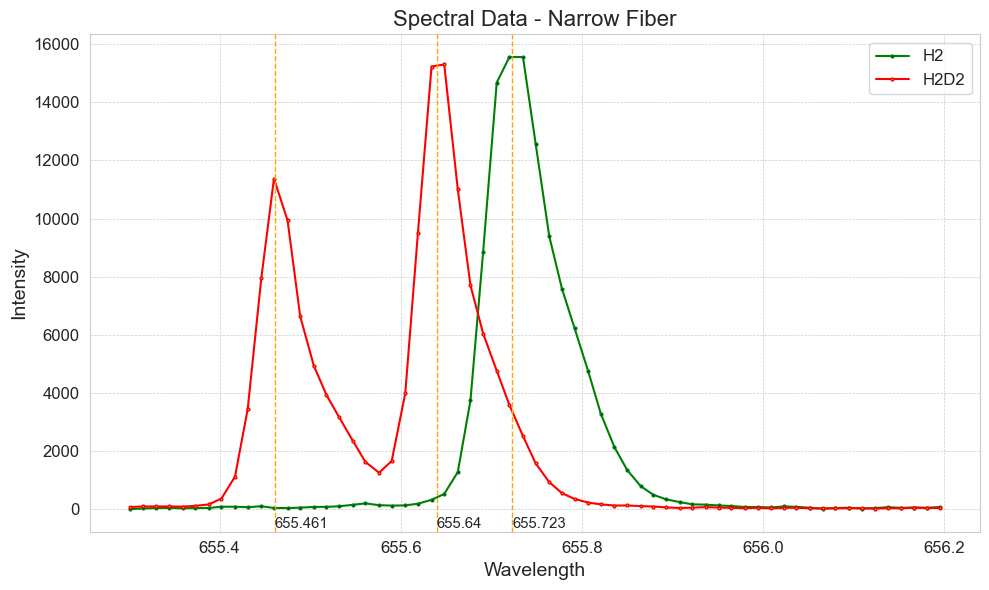

In [133]:
plot_dual_spectral_data(*h2_2_filtered, *h2d2_2_filtered, label1='H2', label2='H2D2', title='Spectral Data - Wide Fiber', vertical_bars=[655.51, 655.72, 656.065, 658.1])
plot_dual_spectral_data(*h2_1_filtered, *h2d2_3_filtered, label1='H2', label2='H2D2', title='Spectral Data - Narrow Fiber', vertical_bars=[655.461, 655.64, 655.723])